In [1]:
import pandas as pd
import numpy as np

In [4]:
table2=pd.read_csv('../data_in/Book1.csv')

In [9]:
table2.columns

Index(['Consumer ID', 'Arrival time', 'Purchase?       (1-Yes, 0-No)',
       'Service End Time (Student)', 'Departure Time', 'Queue Length'],
      dtype='object')

In [6]:
len(table2)

700

In [10]:
table2['Queue Length']=0
for i in range(1,len(table2)):
    for j in range(0, i):
        if table2.loc[j,'Purchase?       (1-Yes, 0-No)']==1:
            if table2.loc[j,'Departure Time'] > table2.loc[i,'Arrival time']:
                table2.loc[i,'Queue Length']+=1

In [11]:
table2

,Consumer ID,Arrival time,"Purchase? (1-Yes, 0-No)",Service End Time (Student),Departure Time,Queue Length
0,13001,3.4367,1,4.1798,4.1798,0
1,13002,5.3442,0,-,5.3442,0
2,13003,9.1931,0,-,9.1931,0
3,13004,9.6333,0,-,9.6333,0
4,13005,10.0376,1,11.2393,11.2393,0
...,...,...,...,...,...,...
695,13696,2338.0263,0,-,2338.0263,0
696,13697,2343.9763,0,-,2343.9763,0
697,13698,2349.6819,1,2358.2051,2358.2051,0
698,13699,2352.3938,0,-,2352.3938,1


In [19]:
table2.pivot_table(index='Queue Length', values='Consumer ID', aggfunc='count')

,Consumer ID
Queue Length,
0,293
1,165
2,89
3,51
4,50
5,52


In [20]:
table2.groupby('Purchase?       (1-Yes, 0-No)')['Queue Length'].max()

Purchase?       (1-Yes, 0-No)
0    5
1    4
Name: Queue Length, dtype: int64

In [21]:
table2['Threshold']=4

In [41]:
table2['Interarrival Time']=0
table2['Service Time']=0
table2['Service End Time']=0

In [42]:
table2

,Consumer ID,Arrival time,"Purchase? (1-Yes, 0-No)",Service End Time (Student),Departure Time,Queue Length,Threshold,Interarrival Time,Service Time,Service End Time
0,13001,3.4367,1,4.1798,4.1798,0,4,0,0,0
1,13002,5.3442,0,-,5.3442,0,4,0,0,0
2,13003,9.1931,0,-,9.1931,0,4,0,0,0
3,13004,9.6333,0,-,9.6333,0,4,0,0,0
4,13005,10.0376,1,11.2393,11.2393,0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...
695,13696,2338.0263,0,-,2338.0263,0,4,0,0,0
696,13697,2343.9763,0,-,2343.9763,0,4,0,0,0
697,13698,2349.6819,1,2358.2051,2358.2051,0,4,0,0,0
698,13699,2352.3938,0,-,2352.3938,1,4,0,0,0


In [39]:
# 检查第一行服务时间
if table2.loc[0,'Purchase?       (1-Yes, 0-No)']==1:
    # 如果第一个顾客购买了商品，那么服务时间就是他的离开时间减去到达时间
    table2.loc[0,'Service End Time']=table2.loc[0,'Service End Time(Student)']
    table2.loc[0,'Service Time']=table2.loc[0,'Service End Time'] - table2.loc[0,'Arrival time']
# 如果第一个顾客没买，服务时间，服务结束时间都是0，因为初始设置为0，所以不用再赋值

for i in range(1,len(table2)):
    table2.loc[i,'Interarrival Time']=table2.loc[i,'Arrival time']-table2.loc[i-1,'Arrival time']
    if table2.loc[i,'Purchase?       (1-Yes, 0-No)']==0:
        # 如果顾客没买，服务时间为0和服务结束时间为上一个顾客的服务结束时间时间
        table2.loc[i,'Service Time']=0
        table2.loc[i,'Service End Time']=table2.loc[i-1,'Service End Time']
        #table2.loc[i,'Departure Time']=table2.loc[i,'Arrival time']
    else:
        # 如果顾客买单的话，服务结束时间为离开时间
        table2.loc[i,'Service End Time']=table2.loc[i,'Departure Time']
        # 该顾客服务时间为该顾客的服务结束时间减去该顾客的到达时间和该顾客的服务结束时间减去上一个顾客的服务结束时间的最小值
        table2.loc[i,'Service Time']=min(table2.loc[i,'Service End Time']-table2.loc[i,'Arrival time'],
                                        table2.loc[i,'Service End Time']-table2.loc[i-1,'Service End Time'])
        # table2.loc[i,'Departure Time']=table2.loc[i,'Arrival time']+table2.loc[i,'Service Time']

/var/folders/c5/0blph9w901j00fymqh_2qlth0000gn/T/ipykernel_92586/1911364654.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.9074999999999998' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  table2.loc[i,'Interarrival Time']=table2.loc[i,'Arrival time']-table2.loc[i-1,'Arrival time']
/var/folders/c5/0blph9w901j00fymqh_2qlth0000gn/T/ipykernel_92586/1911364654.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.3442' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  table2.loc[i,'Service End Time']=table2.loc[i,'Arrival time']
/var/folders/c5/0blph9w901j00fymqh_2qlth0000gn/T/ipykernel_92586/1911364654.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.20

In [40]:
lambda_ = 1 / np.mean(table2.loc[1:, 'Interarrival Time'])
mu_ = 1 / np.mean(table2.loc[table2['Purchase?       (1-Yes, 0-No)'] == 1, 'Service Time'])
print(lambda_, mu_)

0.2969911608802393 5.907415517116076


In [72]:
table3=pd.DataFrame(columns=['Arrival Time','Purchase','Departure Time','Queue Length','Interarrival Time','Service Time','Service End Time','WTP'])

In [73]:
import numpy as np

In [74]:
lambda_=0.29
mu_=0.2019
threshold=4
price=7
table3.loc[0,'Arrival Time']=0
table3.loc[0,'Queue Length']=0
table3.loc[0,'Interarrival Time']=np.random.exponential(1/lambda_)
table3.loc[0,'Service Time']=np.random.exponential(1/mu_)
table3.loc[0,'WTP']=np.random.uniform(0,14)
table3.loc[0,'Service End Time']=0
table3.loc[0,'Purchase']=0
table3.loc[0,'Departure Time']=0


In [80]:

for i in range(1,701):
    table3.loc[i,'Interarrival Time']=np.random.exponential(1/lambda_)
    table3.loc[i,'Service Time']=np.random.exponential(1/mu_)
    table3.loc[i,'Arrival Time']=table3.loc[i-1,'Arrival Time']+table3.loc[i,'Interarrival Time']
    table3.loc[i,'WTP']=np.random.uniform(0,14)
    
    table3.loc[i,'Queue Length']=0
    for j in range(0, i):
        if table3.loc[j,'Purchase']==1:
            if table3.loc[j,'Departure Time'] > table3.loc[i,'Arrival Time']:
                table3.loc[i,'Queue Length']+=1

    if table3.loc[i,'WTP']>=price and table3.loc[i,'Queue Length']<=threshold:
        table3.loc[i,'Purchase']=1
        table3.loc[i,'Service End Time']=max(table3.loc[i,'Arrival Time'],
                                             table3.loc[i-1,'Departure Time'])+table3.loc[i,'Service Time']
        table3.loc[i,'Departure Time']=table3.loc[i,'Service End Time']
    else:
        table3.loc[i,'Purchase']=0
        table3.loc[i,'Service Time']=0
        table3.loc[i,'Service End Time']=table3.loc[i,'Arrival Time']
        table3.loc[i,'Departure Time']=table3.loc[i,'Arrival Time']


In [82]:
sales=table3['Purchase'].sum()
profit=(price-2.68)*sales
sales, profit

(340, 1468.8000000000002)

In [107]:
import pandas as pd
import numpy as np

def simulate(lambda_, mu_, a, b, threshold, price): # lambda_为到达率，mu_为服务率，a为WTP的下界，b为WTP的上界，threshold为队列长度阈值，price为价格
    table3=pd.DataFrame(columns=['Interarrival Time','Service Time','Arrival Time','WTP',
                                 'Queue Length','Purchase','Service End Time','Departure Time'])

    # 初始值，不影响最终结果
    table3.loc[0,'Arrival Time']=0
    table3.loc[0,'Queue Length']=0
    table3.loc[0,'Interarrival Time']=np.random.exponential(1/lambda_)
    table3.loc[0,'Service Time']=np.random.exponential(1/mu_)
    table3.loc[0,'WTP']=np.random.uniform(a, b)
    table3.loc[0,'Service End Time']=0
    table3.loc[0,'Purchase']=0
    table3.loc[0,'Departure Time']=0

    # 生成数据
    for i in range(1,701):
        # 已知分布的随机数
        table3.loc[i,'Interarrival Time']=np.random.exponential(1/lambda_)
        table3.loc[i,'Service Time']=np.random.exponential(1/mu_)
        table3.loc[i,'Arrival Time']=table3.loc[i-1,'Arrival Time']+table3.loc[i,'Interarrival Time']
        table3.loc[i,'WTP']=np.random.uniform(0,14)

        # 计算队列长度
        table3.loc[i,'Queue Length']=0 # 初始化队列长度
        for j in range(0, i):
            if table3.loc[j,'Purchase']==1: # 如果前面的顾客购买
                if table3.loc[j,'Departure Time'] > table3.loc[i,'Arrival Time']: # 如果前面的顾客离开时间大于当前顾客到达时间
                    table3.loc[i,'Queue Length']+=1 # 队列长度加1

        # 判断是否购买
        if table3.loc[i,'WTP']>=price and table3.loc[i,'Queue Length']<=threshold:
            table3.loc[i,'Purchase']=1
            table3.loc[i,'Service End Time']=max(table3.loc[i,'Arrival Time'],
                                                 table3.loc[i-1,'Departure Time'])+table3.loc[i,'Service Time'] # 购买的顾客服务结束时间为到达时间和上一个顾客离开时间的最大值加上服务时间
            table3.loc[i,'Departure Time']=table3.loc[i,'Service End Time'] # 购买的顾客离开时间为服务结束时间
        else:
            table3.loc[i,'Purchase']=0
            table3.loc[i,'Service Time']=0 # 不购买的顾客服务时间为0
            table3.loc[i,'Service End Time']=table3.loc[i,'Arrival Time'] # 不购买的顾客服务结束时间为到达时间
            table3.loc[i,'Departure Time']=table3.loc[i,'Arrival Time'] # 不购买的顾客离开时间为到达时间

    consumer_count=table3['Purchase'].sum() # 购买的顾客数量（初始值为0，不影响总和）
    total_revenue=price*consumer_count
    profit=(price-2.68)*consumer_count
    average_profit=profit/consumer_count
    return price, consumer_count, total_revenue, profit, average_profit

In [108]:
for price in np.arange(6, 10.5, 0.5):
    price, consumer_count, total_revenue, profit, average_profit = simulate(0.29, 0.2019, 0, 14, 4, price)
    print(f"Price: {price:.2f}, Consumer Count: {consumer_count:.2f}, Total Revenue: {total_revenue:.2f}, Total Profit: {profit:.2f}, Average Profit: {average_profit:.2f}")


Price: 6.00, Consumer Count: 386.00, Total Revenue: 2316.00, Total Profit: 1128.80, Average Profit: 2.92
Price: 6.50, Consumer Count: 371.00, Total Revenue: 2411.50, Total Profit: 1298.80, Average Profit: 3.50
Price: 7.00, Consumer Count: 361.00, Total Revenue: 2527.00, Total Profit: 1468.80, Average Profit: 4.07
Price: 7.50, Consumer Count: 306.00, Total Revenue: 2295.00, Total Profit: 1638.80, Average Profit: 5.36
Price: 8.00, Consumer Count: 290.00, Total Revenue: 2320.00, Total Profit: 1808.80, Average Profit: 6.24
Price: 8.50, Consumer Count: 273.00, Total Revenue: 2320.50, Total Profit: 1978.80, Average Profit: 7.25
Price: 9.00, Consumer Count: 277.00, Total Revenue: 2493.00, Total Profit: 2148.80, Average Profit: 7.76
Price: 9.50, Consumer Count: 234.00, Total Revenue: 2223.00, Total Profit: 2318.80, Average Profit: 9.91
Price: 10.00, Consumer Count: 220.00, Total Revenue: 2200.00, Total Profit: 2488.80, Average Profit: 11.31


In [110]:
import pandas as pd
import numpy as np

In [116]:
x=np.array([1,2,3,4,5,6,7])
y=np.array([1,2,3,4,5,6,7])
weekday1=np.array([1,0,0,0,1,1,1])
weekday2=np.array([1,1,0,0,0,1,1])
weekday3=np.array([1,1,1,0,0,0,1])
weekday4=np.array([1,1,1,1,0,0,0])
weekday5=np.array([0,1,1,1,1,0,0])
weekday6=np.array([0,0,1,1,1,1,0])
weekday7=np.array([0,0,0,1,1,1,1])


In [117]:
weekday1 = np.array(weekday1)
constraint1 = np.dot(x.transpose(), weekday1) + np.dot(y.transpose(), weekday1)
constraint1

38

In [118]:
from selenium.webdriver.common.by import By
from selenium import webdriver
import unittest

class WebKitFeatureStatusTest(unittest.TestCase):

    def test_feature_status_page_search(self):
        self.driver.get("https://webkit.org/status/")

        # Enter "CSS" into the search box.
        search_box = self.driver.find_element_by_id("search")
        search_box.send_keys("CSS")
        value = search_box.get_attribute("value")
        self.assertTrue(len(value) > 0)
        search_box.submit()

        # Count the results.
        feature_count = self.shown_feature_count()
        self.assertTrue(len(feature_count) > 0)

    def test_feature_status_page_filters(self):
        self.driver.get("https://webkit.org/status/")

        filters = self.driver.find_element(By.CSS_SELECTOR, "ul#status-filters li input[type=checkbox]")
        self.assertTrue(len(filters) is 7)

        # Make sure every filter is turned off.
        for checked_filter in filter(lambda f: f.is_selected(), filters):
            checked_filter.click()

        # Count up the number of items shown when each filter is checked.
        unfiltered_count = self.shown_feature_count()
        running_count = 0
        for filt in filters:
            filt.click()
            self.assertTrue(filt.is_selected())
            running_count += self.shown_feature_count()
            filt.click()

        self.assertTrue(running_count is unfiltered_count)

    def shown_feature_count(self):
        return len(self.driver.execute_script("return document.querySelectorAll('li.feature:not(.is-hidden)')"))

def setup_module(module):
    WebKitFeatureStatusTest.driver = webdriver.Safari()

def teardown_module(module):
    WebKitFeatureStatusTest.driver.quit()

if __name__ == '__main__':
    unittest.main()

<>:25: SyntaxWarning: "is" with 'int' literal. Did you mean "=="?
<>:25: SyntaxWarning: "is" with 'int' literal. Did you mean "=="?
/var/folders/c5/0blph9w901j00fymqh_2qlth0000gn/T/ipykernel_2846/1218364354.py:25: SyntaxWarning: "is" with 'int' literal. Did you mean "=="?
  self.assertTrue(len(filters) is 7)
usage: ipykernel_launcher.py [-h] [-v] [-q] [--locals] [--durations N] [-f]
                             [-c] [-b] [-k TESTNAMEPATTERNS]
                             [tests ...]
ipykernel_launcher.py: error: argument -f/--failfast: ignored explicit argument '/Users/jasonhan/Library/Jupyter/runtime/kernel-v3601e9212fc08d1f33723421c7b1cb6ab4ab2be03.json'


AttributeError: 'tuple' object has no attribute 'tb_frame'

In [4]:
import numpy as np
np.random.uniform(1, 2)>1.5

True

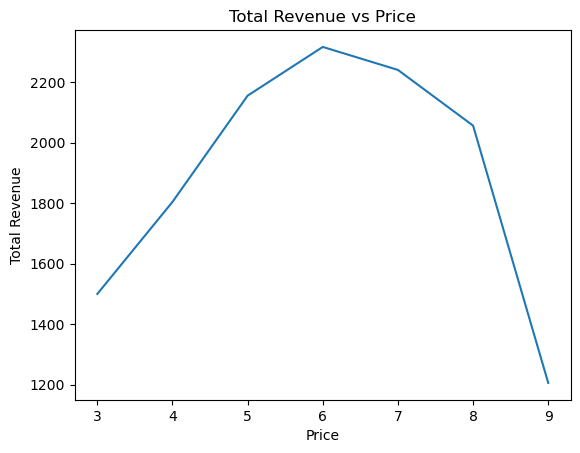

In [5]:
from group_project import decision_table
df = decision_table()
df.update_table()
df.revenue_plot(step=1)

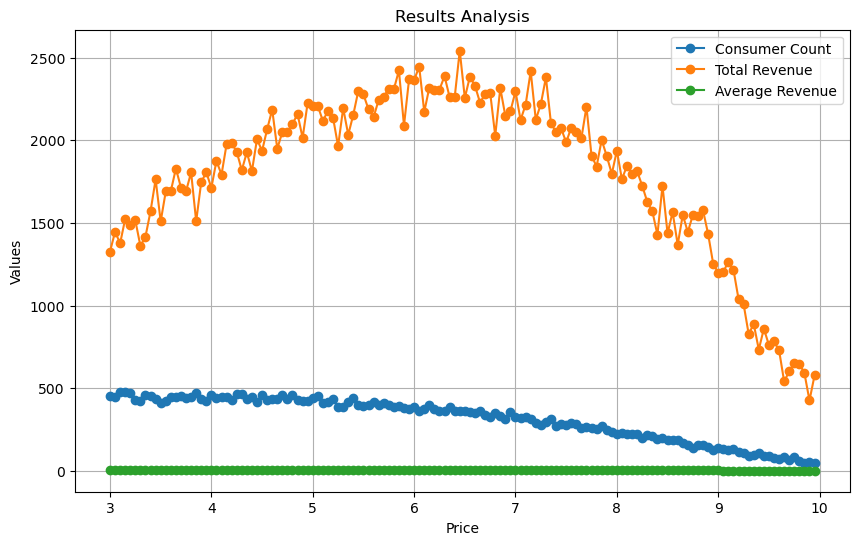

In [1]:
from group_project import decision_table
df = decision_table()
df.final_results(step=0.05)
df.final_plot()

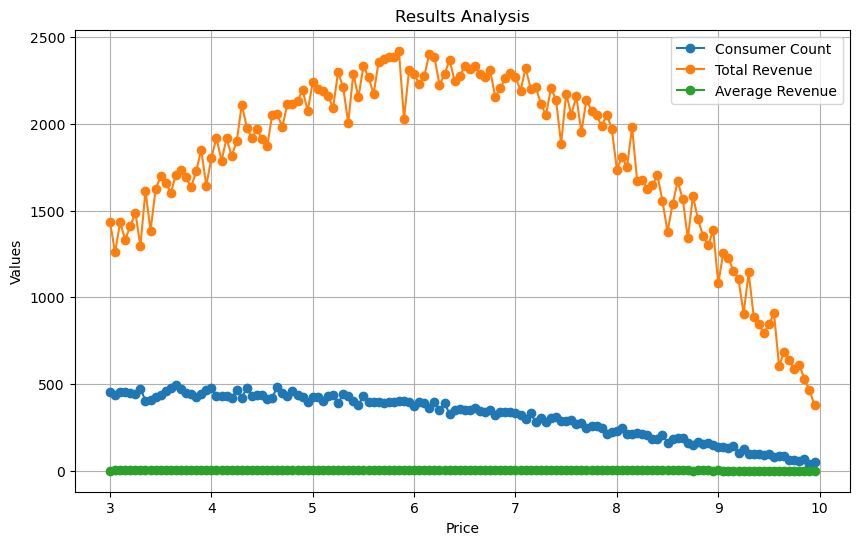

In [2]:
from group_project import decision_table
df = decision_table()
df.final_results(step=0.05)
df.final_plot()